In [1]:
Base.chr2ind(m::IJulia.Msg, str::String, ic::Int64) = Base.chr2ind(m, str, Int32(ic))

In [2]:
using DynamicalBilliards
DynamicalBilliards.enableplotting()

In [ ]:
r = 2.3
a = 1.0
b = 0.5

bt = billiard_rectangle(r, r; setting = "periodic")
d1 = Disk([0., 0.], a)
d2 = Disk([r, 0.], a)
d3 = Disk([0., r], a)
d4 = Disk([r, r], a)
dc = Disk([r/2, r/2], b)

push!(bt, dc, d1,d2,d3,d4)  #Billiard_table

p = randominside(bt)

plot_billiard(bt)
plot_particle(p)

m = eye(4)
t = 10000.0

ts, pos, vel, exps = evolve!(p, bt, t, m)

xt = [pos[i][1] for i in 1:length(pos)]
yt = [pos[i][2] for i in 1:length(pos)]

plot_billiard(bt, xt, yt)
plot_particle(p)

In [4]:
exps

4-element Array{Float64,1}:
  0.73276   
  0.00534641
 -0.0967875 
 -0.641319  

In [5]:
pos[1]

2-element SVector{2,Float64}:
 1.20888
 1.70582

In [4]:
exps

4-element Array{Float64,1}:
  1.73305  
  0.0230703
 -0.940157 
 -0.815962 

In [6]:
r = eye(4)

4×4 Array{Float64,2}:
 1.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0
 0.0  0.0  1.0  0.0
 0.0  0.0  0.0  1.0

In [7]:
t = 3.0
rt = Float64[]
rpos = SVector{2,Float64}[]
rvel = SVector{2,Float64}[]
    
dvec1 = Vector{Float64}[]
dvec2 = Vector{Float64}[]
dvec3 = Vector{Float64}[]
dvec4 = Vector{Float64}[]

push!(dvec1,r[:,1])
push!(dvec2,r[:,2])
push!(dvec3,r[:,3])
push!(dvec4,r[:,4])

push!(rpos, p.pos)
push!(rvel, p.vel)
push!(rt, 0.0)

count = zero(t)
colobst_idx = 1
t_to_write = 0.0

norms = ones(1,4)

count

0.0

In [8]:
tcol = 0.0
tmin = Inf

for i in eachindex(bt)
    tcol = collisiontime(p, bt[i])
    # Set minimum time:
        if tcol < tmin
            tmin = tcol
            colobst_idx = i
        end
end#obstacle loop

In [9]:
tmin
colobst_idx
bt[colobst_idx]

Disk
center: [1.15, 1.15]
radius: 0.5

In [10]:
p

Particle
position: [0.954991, 0.507143]
velocity: [-0.284798, 0.958588]

In [11]:
propagate!(p, tmin, r)

In [12]:
p

Particle
position: [0.891079, 0.722262]
velocity: [-0.284798, 0.958588]

In [13]:
r

4×4 Array{Float64,2}:
 1.0  0.0  0.224412  0.0     
 0.0  1.0  0.0       0.224412
 0.0  0.0  1.0       0.0     
 0.0  0.0  0.0       1.0     

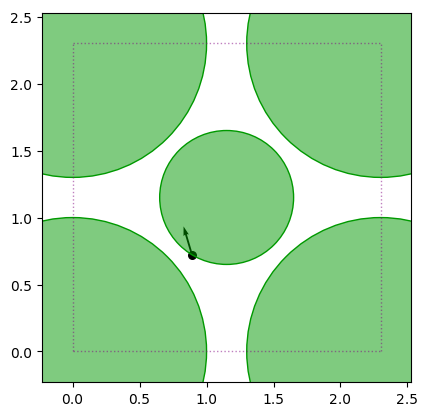

(PyObject <matplotlib.collections.PathCollection object at 0xd441588c>, PyObject <matplotlib.quiver.Quiver object at 0xd44190ec>)

In [14]:
plot_billiard(bt)
plot_particle(p)

In [15]:
 z = gramschmidt(r)

4×4 Array{Float64,2}:
 1.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0
 0.0  0.0  1.0  0.0
 0.0  0.0  0.0  1.0

In [16]:
            resolvecollision!(p, bt[colobst_idx], r)


ti[-0.958588, -0.284798]
tf[0.192147, -0.981366]


In [17]:
r

4×4 Array{Float64,2}:
  0.463681  -0.886002   0.104055  -0.198829 
 -0.886002  -0.463681  -0.198829  -0.104055 
 -1.09544   -0.325458   0.217852  -0.959039 
  5.59482    1.66223    0.369539  -0.0906577

In [34]:
r = gramschmidt(r)

4×4 Array{Float64,2}:
  0.463681  -1.01965      0.0301186   0.0841208
 -0.886002  -0.208306    -0.153827   -0.429635 
 -1.09544   -0.00971459   0.284555   -0.229004 
  5.59482    0.0496159    0.0288584  -0.119847 

In [35]:
a =  [norm(r[:,j]) for j in 1:4]

4-element Array{Float64,1}:
 5.78809 
 1.04194 
 0.326151
 0.508399

In [36]:
 norms = vcat(norms,a')

2×4 Array{Float64,2}:
 1.0      1.0      1.0       1.0     
 5.78809  1.04194  0.326151  0.508399

In [37]:
for j in 1:4
    r[:,j] = r[:,j]/norm(r[:,j])
end
                 

In [38]:
norm(r[:,1])

1.0

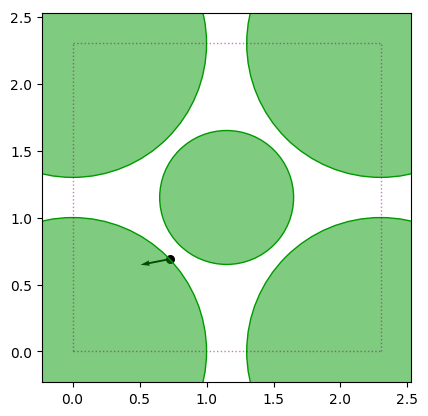

(PyObject <matplotlib.collections.PathCollection object at 0xce8cd3ac>, PyObject <matplotlib.quiver.Quiver object at 0xce8cdbec>)

In [43]:
plot_billiard(bt)
plot_particle(p)

In [40]:
 for i in eachindex(bt)
            tcol = collisiontime(p, bt[i])
            # Set minimum time:
            if tcol < tmin
                tmin = tcol
                colobst_idx = i
            end
        end#obstacle loop


In [41]:
  propagate!(p, tmin, r)

In [42]:
r

4×4 Array{Float64,2}:
  0.047927   -0.980195     0.240705    0.0888664
  0.0112945  -0.191824    -0.456597   -0.885161 
 -0.189258   -0.00932358   0.872466   -0.450442 
  0.966609    0.0476189    0.0884818  -0.235735 

In [46]:
dot(r[:,1], r[:,4])

-0.14835203873224292

In [47]:
norms

2×4 Array{Float64,2}:
 1.0      1.0      1.0       1.0     
 5.78809  1.04194  0.326151  0.508399